business question.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


Data
Variable Description
Loan_ID - Unique Loan ID
Gender - Male/ Female
Married - Applicant married (Y/N)
Dependents - Number of dependents
Education - Applicant Education (Graduate/ Under Graduate)
Self_Employed - Self employed (Y/N)
ApplicantIncome - Applicant income
CoapplicantIncome - Coapplicant income
LoanAmount - Loan amount in thousands
Loan_Amount_Term - Term of loan in months
Credit_History - credit history meets guidelines
Property_Area - Urban/ Semi Urban/ Rural
Loan_Status - loan approved (Y/N)

Road map:
    
understand the business needs
get the data(analytics vidya load prediction 3)
understand the data
make some hypothesis
do some visualizations
data preprocessing 

model: classification model lets use logistic regression, tree based methods, svm
    


In [2]:
##### get the packages and the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
train_data = pd.read_csv('C:\\Users\\amogh\\Downloads\\train_u6lujuX_CVtuZ9i.csv') 

In [168]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
train_data.shape

(614, 13)

In [6]:
train_data.info()
# missing values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
##### descriptive statistics

In [8]:

train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# ApplicantIncome is greater than CoapplicantIncome 


In [ ]:
# lets see visualization  on numarical data 

Text(0.5,0,'LoanAmount')

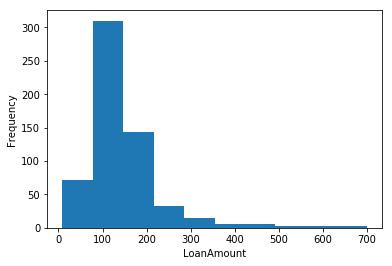

In [15]:
%matplotlib inline
train_data['LoanAmount'].plot(kind='hist')
plt.xlabel('LoanAmount')

Text(0.5,0,'Loan_Amount_Term')

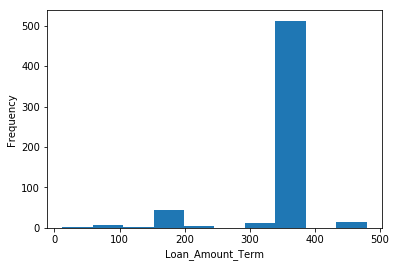

In [16]:
train_data['Loan_Amount_Term'].plot(kind='hist')
plt.xlabel('Loan_Amount_Term')

In [23]:
l  = train_data['Credit_History'].value_counts()
print(l)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


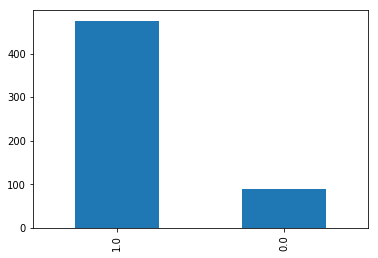

In [24]:
l.plot(kind='bar')

In [25]:
# lets see for categorical variables

In [26]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [31]:
p = train_data['Dependents'].value_counts()
print(p)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


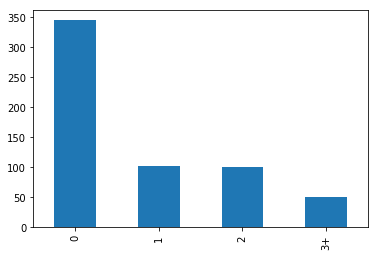

In [32]:
p.plot(kind='bar')

In [30]:
train_data['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [31]:
train_data['Self_Employed'].value_counts()

Series([], Name: Self_Employed, dtype: int64)

In [32]:
train_data['Property_Area'].value_counts()

Series([], Name: Property_Area, dtype: int64)

In [40]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# lets fill the missing values and convert to numerical

In [169]:
train_data['Gender'].fillna('Male',inplace=True)

In [170]:
train_data['Gender'] = train_data['Gender'].map({'Male':1,'Female':0})

In [171]:
train_data['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [172]:
train_data['Married'].fillna('Yes',inplace=True)

In [173]:
train_data['Married'] = train_data['Married'].map({'Yes':1,'No':0})

In [174]:
train_data['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [175]:
train_data['Dependents'].fillna('0',inplace=True)

In [176]:
train_data['Dependents']= train_data['Dependents'].replace('3+',3)

In [177]:
train_data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [178]:
train_data['Education']=train_data['Education'].map({'Graduate':1,'Not Graduate':0})

In [179]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [180]:
train_data['Self_Employed'].fillna('No',inplace=True)

In [181]:
train_data['Self_Employed'] = train_data['Self_Employed'].map({'No':0,'Yes':1})

In [182]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)


In [183]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(),inplace=True)

In [184]:
train_data['Credit_History'].fillna(1.0,inplace=True)

In [185]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
#train_data.info()

In [401]:

train_data['Dependents'] = pd.Categorical(train_data['Dependents'])

In [186]:
train_data['Property_Area'] = train_data['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2})

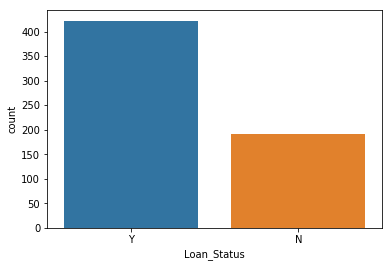

In [93]:
#fig ,axs = plt.subplot(1,2,figsize=(10,10))

sns.countplot(x='Loan_Status',data=train_data)
#set_title['Frequency_Loan_status']

In [60]:
train_data['Loan_Status']=train_data['Loan_Status'].map({'Y':1,'N':0})

#train_data['Loan_Status'] = train_data['Loan_Status'].astype('int')

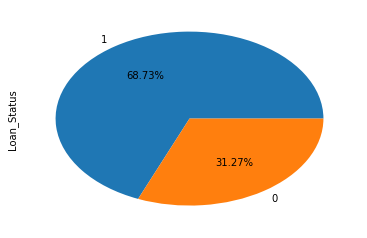

In [64]:
%matplotlib inline
train_data['Loan_Status'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [62]:
train_data['Dependents'] = train_data['Dependents'].astype('int')

In [196]:
def test(train_data):
    train_data['Gender'].fillna('Male',inplace=True)
    train_data['Gender'] = train_data['Gender'].map({'Male':1,'Female':0})
    
    train_data['Married'].fillna('Yes',inplace=True)   
    train_data['Married'] = train_data['Married'].map({'Yes':1,'No':0})

    train_data['Dependents'].fillna('0',inplace=True)
    train_data['Dependents']= train_data['Dependents'].replace('3+',3)
    #train_data['Dependents'] = pd.Categorical(train_data['Dependents'])

    train_data['Education']=train_data['Education'].map({'Graduate':1,'Not Graduate':0})

    train_data['Self_Employed'].fillna('No',inplace=True)
    train_data['Self_Employed'] = train_data['Self_Employed'].map({'No':0,'Yes':1})

    train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)

    train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(),inplace=True)

    train_data['Credit_History'].fillna(1.0,inplace=True)

    train_data['Property_Area'] = train_data['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2})
    #train_data['Property_Area']=pd.Categorical(train_data['Property_Area'])
    return(train_data.head())



In [197]:
test_data = pd.read_csv('C:\\Users\\amogh\\Downloads\\test_Y3wMUE5_7gLdaTN.csv')

In [198]:
test(test_data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,0
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,0
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,0


In [108]:
test_data['Dependents'] = test_data['Dependents'].astype('int')

In [32]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null int32
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 33.1+ KB


In [183]:
# lets see some bivarient visualization and aggregations



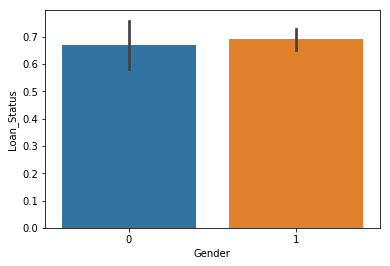

In [56]:
%matplotlib inline
sns.barplot(y='Loan_Status',x='Gender',data=train_data)

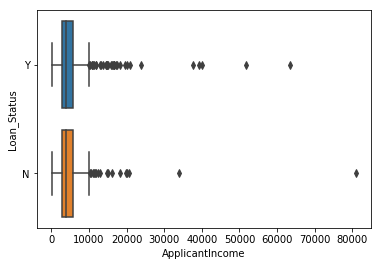

In [97]:
sns.boxplot(x='ApplicantIncome',y='Loan_Status',data=train_data)

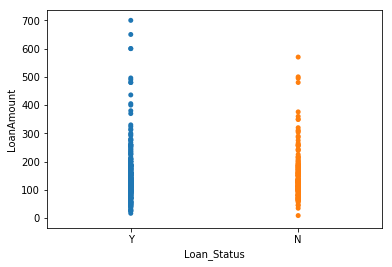

In [98]:
sns.stripplot(x='Loan_Status',y='LoanAmount',data=train_data)

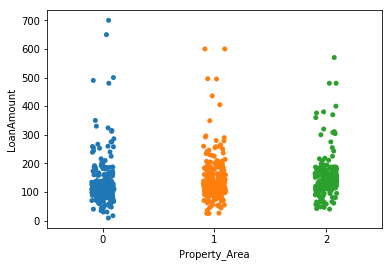

In [99]:
sns.stripplot(x='Property_Area',y='LoanAmount',data=train_data,jitter=True)

In [235]:
train_data.groupby(['Loan_Status','Gender','Married','Self_Employed','Property_Area','Education']).mean().head(5)

Dependents  \
Loan_Status Gender Married Self_Employed Property_Area Education               
0           0      0       0             0             0            1.500000   
                                                       1            0.750000   
                                         1             1            0.222222   
                                         2             0            0.500000   
                                                       1            0.000000   

                                                                  ApplicantIncome  \
Loan_Status Gender Married Self_Employed Property_Area Education                    
0           0      0       0             0             0              2275.000000   
                                                       1              2916.000000   
                                         1             1              4393.111111   
                                         2             0              4003.000000   
                                                       1              5199.000000   

                                                                  CoapplicantIncome  \
Loan_Status Gender Married Self_Employed Property_Area Education                      
0           0      0       0             0             0                       0.00   
                                                       1                    5441.25   
                                         1             1                     200.00   
                                         2             0                       0.00   
                                                       1                    1051.75   

                                                                  LoanAmount  \
Loan_Status Gender Married Self_Employed Property_Area Education               
0           0      0       0             0             0          104.000000   
                                                       1          131.375000   
                                         1             1          124.333333   
                                         2             0           88.000000   
                                                       1          139.250000   

                                                                  Loan_Amount_Term  \
Loan_Status Gender Married Self_Employed Property_Area Education                     
0           0      0       0             0             0                     360.0   
                                                       1                     352.5   
                                         1             1                     324.0   
                                         2             0                     360.0   
                                                       1                     390.0   

                                                                  Credit_History  
Loan_Status Gender Married Self_Employed Property_Area Education                  
0           0      0       0             0             0                0.000000  
                                                       1                0.500000  
                                         1             1                0.444444  
                                         2             0                1.000000  
                                                       1                1.000000

In [ ]:
# credit score is playing an important role

In [249]:
train_data[['Gender','Loan_Status']].groupby(['Gender']).mean()

,Loan_Status
Gender,
0,0.669643
1,0.691235


In [258]:
train_data[['ApplicantIncome','Loan_Status','CoapplicantIncome']].groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome
Loan_Status,,
0,5446.078125,1877.807292
1,5384.068720,1504.516398


In [120]:
train_data[['Loan_Status','Education','Gender']].groupby(['Education','Gender']).mean()


Loan_Status
Education Gender             
0         0          0.700000
          1          0.596491
1         0          0.663043
          1          0.719072

In [123]:
train_data[['Loan_Amount_Term','Loan_Status']].groupby(['Loan_Status']).mean()

#train_data[['Dependents','Loan_Status']].groupby(['Dependents']).mean()

,Loan_Amount_Term
Loan_Status,
0,344.56250
1,341.43128


In [121]:
train_data[['Dependents','Loan_Status','LoanAmount','ApplicantIncome']].groupby(['Dependents','Loan_Status']).mean()

LoanAmount  ApplicantIncome
Dependents Loan_Status                             
0          0            140.725664      5021.778761
           1            132.862348      4886.089069
1          0            162.583333      6211.305556
           1            154.606061      5826.439394
2          0            142.920000      4073.360000
           1            151.750000      5207.513158
3          0            191.722222      8485.833333
           1            186.636364      8633.242424

In [122]:
train_data[['Dependents','LoanAmount','ApplicantIncome']].groupby(['Dependents']).mean()

,LoanAmount,ApplicantIncome
Dependents,,
0,135.330556,4928.680556
1,157.421569,5962.274510
2,149.564356,4926.782178
3,188.431373,8581.215686


In [106]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [96]:
co = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [418]:
cor = train_data[co].corr()
print(cor)

                     Gender   Married  Education  Self_Employed  \
Gender             1.000000  0.364569  -0.045364      -0.000525   
Married            0.364569  1.000000  -0.012304       0.004489   
Education         -0.045364 -0.012304   1.000000       0.010383   
Self_Employed     -0.000525  0.004489   0.010383       1.000000   
ApplicantIncome    0.058809  0.051708   0.140760       0.127180   
CoapplicantIncome  0.082912  0.075948   0.062290      -0.016100   
LoanAmount         0.106904  0.146546   0.168759       0.115100   
Loan_Amount_Term  -0.074030 -0.100912   0.073928      -0.033739   
Credit_History     0.009170  0.010938   0.073658      -0.001550   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.058809           0.082912    0.106904   
Married                   0.051708           0.075948    0.146546   
Education                 0.140760           0.062290    0.168759   
Self_Employed             0.127180          -0.016100

In [286]:
# hypothesis

# more loan is given to educated (true)
# male is given more approval(true)
# higher applicant income (true)
# Dependents with 3 have on avg higher income and going to higher loan

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
std = StandardScaler()

In [111]:
x_train = std.fit_transform(train_data[co])

In [65]:
#x_test = std.fit_transform(test_data[co])

train_data.info()

#train_data['Property_Area'] = pd.Categorical(train_data['Property_Area'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int32
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int32(1), int64(7), object(1)
memory usage: 60.0+ KB


In [287]:
#### modeling 



In [288]:
#we will also see the importance

In [116]:
import statsmodels.api as sm

In [35]:
import pylab as pl

In [412]:
#logit = sm.Logit(train_data['Loan_Status'],train_data[co])

In [40]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.474754
         Iterations 6


In [42]:
y_pred = result.predict(test_data[co])

In [125]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                           10
Date:                Thu, 26 Oct 2017   Pseudo R-squ.:                  0.2358
Time:                        11:18:39   Log-Likelihood:                -291.50
converged:                       True   LL-Null:                       -381.45
                                        LLR p-value:                 2.466e-33
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.3104      0.286     -1.087      0.277      -0.870       0.249
Married               0.5016      0.240      2.091      0.037       0.031       0.972
Dependents            0.

In [ ]:
# decision tree

In [405]:

# decisiontree

from sklearn.tree import DecisionTreeClassifier

In [406]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [407]:
tree.fit(train_data[co],train_data['Loan_Status'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
# lets use adaboost 

from sklearn.ensemble import AdaBoostClassifier

In [63]:
ad = AdaBoostClassifier(base_estimator=tree,n_estimators=500,learning_rate=0.1)

In [ ]:
##### random forest

In [64]:
# random forest 


from sklearn.ensemble import RandomForestClassifier

In [413]:
ran = RandomForestClassifier(n_estimators=700,criterion='gini')

In [414]:
ran.fit(train_data[co],train_data['Loan_Status'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [460]:
y_ran = ran.predict(test_data[co])
#print(y_ran)

In [415]:
importance = ran.feature_importances_

In [155]:
for i in importance:
    print(i)

0.0177280463256
0.0179737024216
0.0227316623332
0.0240380046877
0.043382440602
0.0469796256761
0.0477639158297
0.118573735987
0.187333345435
0.210167567384
0.263327953318


In [156]:
indecies = np.argsort?

In [416]:
indecies = np.argsort(importance)[::-1]

In [417]:
for p in range(train_data[co].shape[1]):
    print('{}....{}'.format(co[indecies[p]],importance[indecies[p]]))
    

Credit_History....0.26673202237568894
ApplicantIncome....0.20461424985953267
LoanAmount....0.18834646811109068
CoapplicantIncome....0.11828357534778587
Dependents....0.04813056535245657
Property_Area....0.046097755283897715
Loan_Amount_Term....0.043942831056385176
Married....0.02395529786871317
Education....0.02334819518147927
Gender....0.018736292337044044
Self_Employed....0.017812747225925716


In [216]:
co


['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [245]:
#o2 = co.remove('Dependents')


In [211]:
co1 = ['LoanAmount','']


In [ ]:
voting classifier

In [132]:


from sklearn.ensemble import VotingClassifier

In [133]:
vc = VotingClassifier?

In [144]:
vc = VotingClassifier(estimators=[('ran',ran),('ad',ad)],voting='hard')

In [147]:
#vc.fit(y=train_data[train_data[co],train_data['Loan_Status'])

In [238]:
y = pd.DataFrame(y_pred)

In [239]:
y = y.replace(1,'Y')

In [240]:
y = y.replace(0,'N')


In [360]:
loan_id = test_data['Loan_ID']


In [377]:
sam = pd.read_csv('C:\\Users\\amogh\\Downloads\\Sample_Submission_ZAuTl8O_FK3zQHh.csv')

In [378]:
sam.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [379]:
sam['Loan_ID']= sam['Loan_ID'].append(test_data['Loan_ID'])

In [381]:
#.to_csv('y.csv',index=False)

sam.to_csv('sam.csv',index=False)

In [241]:
y.to_csv('y4.csv',index=False)

In [458]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,Y


In [459]:
ran.fit(train_data[['Credit_History','ApplicantIncome','LoanAmount','CoapplicantIncome']],train_data['Loan_Status'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
dumm = pd.get_dummies(test_data['Dependents'])

In [200]:
dumm1 = dumm.iloc[:,0:3]

In [201]:
dumm2 = pd.get_dummies(test_data['Property_Area'])

In [202]:
dumm2 = dumm2.iloc[:,0:2]

In [194]:
result = pd.concat([train_data,dumm1,dumm2],axis=1)

In [203]:
result.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,3,0,1,0,1
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,Y,0,1,0,1,0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N,0,0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,Y,0,1,0,1,0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,Y,0,1,0,1,0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,Y,0,1,0,1,0


In [204]:
test = pd.concat([test_data,dumm1,dumm2],axis=1)

In [205]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,3,0,1,0,1
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,0,0,1,0,1,0
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,0,0,1,1,0
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0,0,0,0,1,0
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,0,0,0,0,1,0
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,0,0,1,0,1,0


In [206]:
from xgboost import XGBClassifier

In [208]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
Loan_ID              367 non-null object
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null object
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
3                    367 non-null uint8
0                    367 non-null uint8
1                    367 non-null uint8
0                    367 non-null uint8
1                    367 non-null uint8
dtypes: float64(3), int64(7), object(2), uint8(5)
memory usage: 36.3+ KB


In [225]:
co1 = [ 'Gender', 'Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History', 
          3,                 '0',                 '1', 'dep1',                   'dep2']

In [242]:
xg = XGBClassifier()

In [236]:
xg.fit(result[co1],result['Loan_Status'])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [228]:
test = test.rename(columns={0:'dep1'})

In [237]:
y_pred = xg.predict(test[co1])